In [180]:
import numpy as np
import matplotlib 
import matplotlib as mpl

import os

from astropy.timeseries import LombScargle
from astropy.table import Table, join, vstack

# configure notebook for plotting
%pylab inline --no-import-all 
mpl.style.use('seaborn-colorblind') # colourblind-friendly colour scheme
colours = mpl.rcParams['axes.prop_cycle'].by_key()['color'] # allows access to colours
# subsequent lines default plot settings
matplotlib.rcParams['image.origin'] = 'lower'
matplotlib.rcParams['figure.figsize']=(8.0,6.0)   
matplotlib.rcParams['font.size']=16              
matplotlib.rcParams['savefig.dpi']= 300             

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [235]:
ddir = '/Users/calinperez/Desktop/PHYS3080/Untitled/U07/'
ddir_back = glob.glob(ddir +'/Back/*/*.csv', recursive= True)
ddir_front = glob.glob(ddir +'/Front/*/*.csv', recursive= True)
ddir_down = glob.glob(ddir +'/Down/*/*.csv', recursive= True)
ddir_up = glob.glob(ddir +'/Up/*/*.csv', recursive= True)
ddir_left = glob.glob(ddir +'/Left/*/*.csv', recursive= True)
ddir_right = glob.glob(ddir +'/Right/*/*.csv', recursive= True)

In [41]:
fname = 'P00245.csv'
data = Table.read(ddir_back[0],format='ascii') # load in CSV data as an astropy Table object
time, flux = data['Time'], data['Flux'] # just extract the columns as variables
dt = np.median(np.diff(time))
print('Nyquist Limit',0.5/dt,'cycles per hour') # can't get frequencies higher than the Nyquist limit

Nyquist Limit 0.5 cycles per hour


Text(0, 0.5, 'Relative Flux')

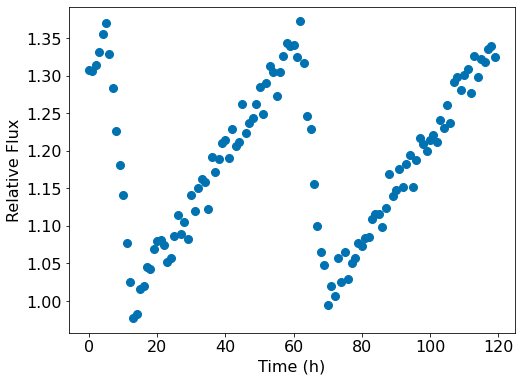

In [42]:
plt.plot(time,flux,'.',markersize=16)
plt.xlabel('Time (h)')
plt.ylabel('Relative Flux')

In [43]:
LS = LombScargle(time,flux) # initialize a Lomb-Scargle algorithm from Astropy
freqs = np.linspace(1/100,0.45,10000) # frequency grid shouldn't go higher than Nyquist limit
power = LS.power(freqs) # calculate LS power

In [44]:
print('Best period: %.2f h' % (1/freqs[np.argmax(power)]))

Best period: 57.93 h


Text(0, 0.5, 'LS Power')

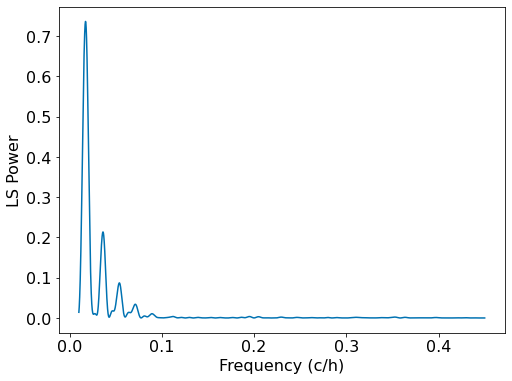

In [45]:
plt.plot(freqs,power)
plt.xlabel('Frequency (c/h)')
plt.ylabel('LS Power')

In [ ]:
import glob # this package lets you search for filenames

fnames = glob.glob(ddir+'*.csv')
print(fnames)

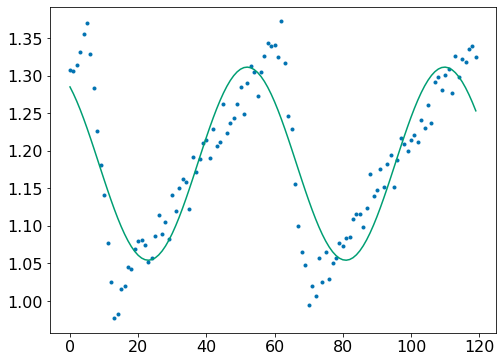

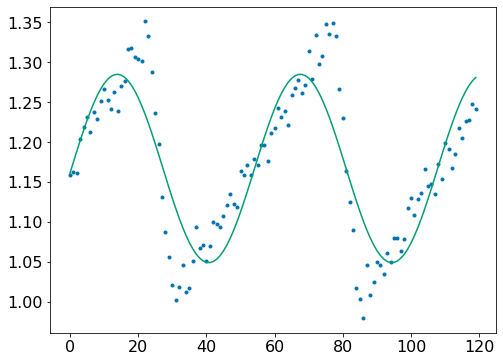

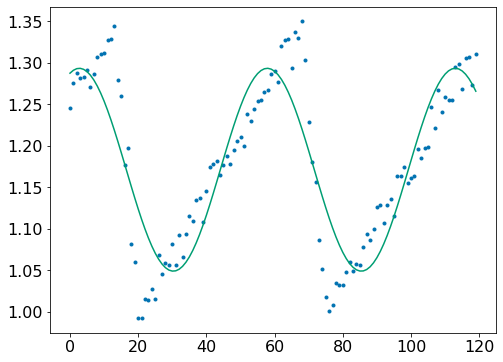

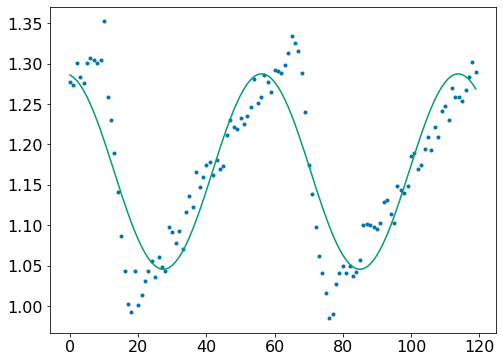

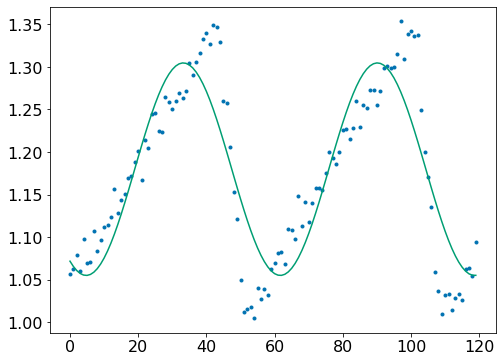

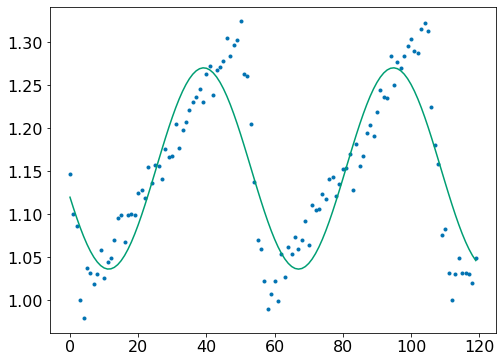

In [208]:
freqs = np.linspace(1/100,0.45,10000) # frequency grid shouldn't go higher than Nyquist limit
periods = [] # start an empty list to hold the period 

for fname in ddir_back:
    data = Table.read(fname,format='ascii') # load in CSV data as an astropy Table object
    time, flux = data['Time'], data['Flux'] # just extract the columns as variables

    LS = LombScargle(time,flux) # initialize a Lomb-Scargle
    power = LS.power(freqs) # calculate LS power 
    bestfreq = freqs[np.argmax(power)] # which frequency has the highest Lomb-Scargle power?
    
    pred = LS.model(time,bestfreq) # make a sine wave prediction at the best frequency
    plt.plot(time,flux,'.')
    plt.plot(time,pred) # plot the model over the data
    plt.show()
     
    periods.append(1/bestfreq) # add each period to the list
    
periods = np.array(periods) # turn it from a list to an array

In [242]:
ddir_points = glob.glob(ddir +'/Back/*/points.txt')
ddir_csv = glob.glob(ddir +'/Back/*/*.csv')

ddir_pointsf = glob.glob(ddir +'/Front/*/points.txt')
ddir_csvf = glob.glob(ddir +'/Front/*/*.csv')

sort = sorted(ddir_points)

for i in sort:
    i = 0
    stars0 = Table.read(sort[i], format = 'ascii')
    stars1 = Table.read(sort[i+1], format = 'ascii')
    par0 = stars0['par']
    par1 = stars1['par']
    if any(par0) and any(par1) > 0.01:
        stars = vstack([stars0,stars1])
    i += 2
    while i < len(sort):
        stars2 = Table.read(sort[i], format = 'ascii')
        par2 = stars2['par']
        if any(par2) > 0.01:
            starsx = vstack([stars2,stars])
        i += 1

#I want to read the first two .txt files and join them in a table, then read the second two and join them to the first joined table and continue until this has gone through all files


varnames = [os.path.split(v)[-1].strip('.csv') for v in ddir_csv]
print(varnames)

['P03057', 'P02233', 'P02789', 'P02410', 'P02286', 'P00245']


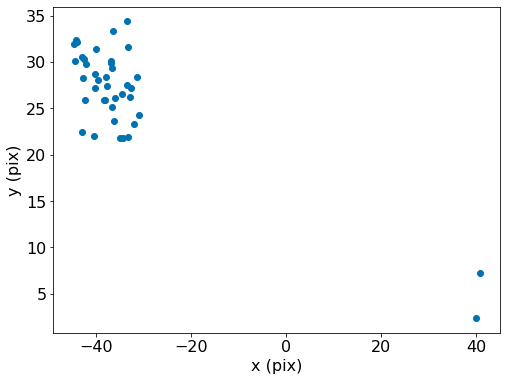

In [243]:
plt.scatter(starsx['x'],starsx['y'])
#plt.scatter(stars1['x'],stars1['y'])
plt.xlabel('x (pix)')
plt.ylabel('y (pix)');

In [244]:

m0, m1, m2 = np.log10(starsx['flux1']), np.log10(starsx['flux2']), np.log10(starsx['flux3']) 
colour = m2-m0

Text(0.5, 0, 'Log Flux 2 - Log Flux 0')

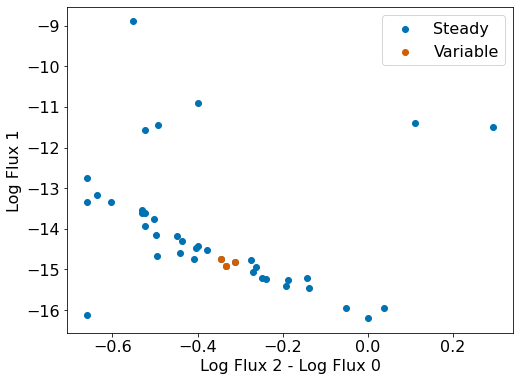

In [245]:
s = plt.scatter(colour,m1)
for var in varnames:
    mm = [starsx['name']==var] # mask
    h = plt.scatter(colour[mm],m1[mm],color=colours[2])
    
plt.legend([s, h],['Steady','Variable'])
plt.ylabel('Log Flux 1')
plt.xlabel('Log Flux 2 - Log Flux 0')

In [280]:
absmag = []
for var in varnames:
    m8 = starsx['flux2']
    mm = [starsx['name']==var] # mask
    absmag.append(m1[mm])
print(absmag)
for i in absmag:
    if len(i) != 0:
        absmag = np.array(absmag)
print(absmag)
print(periods)
absmagg = [-14.735182176990463,  -14.910094888560602,  -14.806875401645538 ]
periodss = [57.93499044, 53.69167159, 55.66442131]

[<Column name='flux2' dtype='float64' length=1>
-14.735182176990463, <Column name='flux2' dtype='float64' length=1>
-14.910094888560602, <Column name='flux2' dtype='float64' length=0>
, <Column name='flux2' dtype='float64' length=0>
, <Column name='flux2' dtype='float64' length=0>
, <Column name='flux2' dtype='float64' length=1>
-14.806875401645538]
[<Column name='flux2' dtype='float64' length=1>
 -14.735182176990463
 <Column name='flux2' dtype='float64' length=1>
 -14.910094888560602
 <Column name='flux2' dtype='float64' length=0>
 <Column name='flux2' dtype='float64' length=0>
 <Column name='flux2' dtype='float64' length=0>
 <Column name='flux2' dtype='float64' length=1>
 -14.806875401645538                           ]
[57.93499044, 53.69167159, 55.66442131]


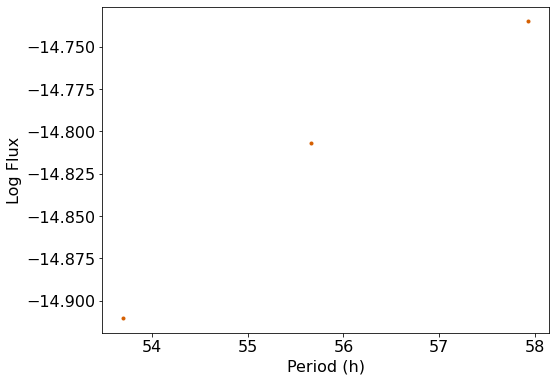

In [281]:
plt.plot(periods,absmagg,'.',color=colours[2])
plt.xlabel('Period (h)')
plt.ylabel('Log Flux');